# 🎸 The Rolling Stones on Spotify: A Data-Driven Exploration of Musical Legacy

## Setting the Stage: Data Cleaning and EDA

Welcome to the opening act of our data-driven journey through the Rolling Stones' musical legacy on Spotify. As a seasoned professional venturing into the world of AI and Machine Learning, I'm excited to explore this dataset and share my findings with you.

In this notebook, we'll focus on data cleaning and initial exploratory data analysis (EDA). These crucial first steps will prepare our dataset for the more advanced analyses to come.

### Our Setlist

1. **Data Inspection**: We'll start by examining our dataset, identifying any inconsistencies, missing values, or potential issues.

2. **Data Cleaning**: Based on our inspection, we'll clean the data, handling duplicates, missing values, and other anomalies.

3. **Initial EDA**: We'll conduct a preliminary exploration of the cleaned data, gaining our first insights into how Spotify categorizes the Rolling Stones' catalog.

4. **Feature Examination**: We'll take a closer look at Spotify's audio features, understanding how they characterize songs.

Let's begin our exploration of the Rolling Stones' digital discography, transforming raw data into the foundation of our musical analysis.

In [1]:
# Run helper functions
%run "./helper_functions.ipynb"

# Load the data
df: pd.DataFrame = load_raw_csv_data('spotify_rolling_stones.csv')
features_dict: pd.DataFrame = load_raw_excel_data('spotify_features_dictionary.xlsx')

### 🎵 **Insight:** Including the Features Dictionary

We're loading both the main dataset and the features dictionary at the start. The features dictionary will be crucial for understanding the meaning of each column in our main dataset, guiding our preprocessing and analysis decisions.

In [2]:
# Display the first few rows of each dataset
print("Rolling Stones Dataset:")
display(df.head())
print("\nFeatures Dictionary:")
display(features_dict)

Rolling Stones Dataset:


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106



Features Dictionary:


,Variable,Description
0,name,the name of the song
1,album,the name of the album
2,release_date,the day month and year the album was released
3,track number,the order the song appears on the album
4,id,the Spotify id for the song
5,uri,the Spotify uri for the song
6,acousticness,A confidence measure from 0.0 to 1.0 of whethe...
7,danceability,Danceability describes how suitable a track is...
8,energy,Energy is a measure from 0.0 to 1.0 and repres...
9,instrumentalness,"Predicts whether a track contains no vocals. ""..."


In [3]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Lets do some basic data preprocessing steps
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check for duplicate songs based on 'name' and 'album'
duplicate_songs = df.duplicated(subset=['name', 'album']).sum()

print(f"Number of completely duplicate rows: {duplicate_rows}")
print(f"Number of duplicate songs (same name and album): {duplicate_songs}")

# If there are duplicates, let's see some examples
if duplicate_songs > 0:
    print("\nExample of duplicate songs:")
    display(df[df.duplicated(subset=['name', 'album'], keep=False)].sort_values(['name', 'album']).head())

Number of completely duplicate rows: 0
Number of duplicate songs (same name and album): 102

Example of duplicate songs:


,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
287,(I Can't Get No) Satisfaction - Live,Voodoo Lounge Uncut (Live),2018-11-16,8,2RxLdgkHPUbUeK0XjkTxjq,spotify:track:2RxLdgkHPUbUeK0XjkTxjq,0.269,0.312,0.961,0.261000,0.9640,-6.426,0.1290,150.904,0.345,16,409792
315,(I Can't Get No) Satisfaction - Live,Voodoo Lounge Uncut (Live),2018-11-16,8,4x0bGTxDypBJaxxR20QPHY,spotify:track:4x0bGTxDypBJaxxR20QPHY,0.269,0.312,0.961,0.261000,0.9640,-6.426,0.1290,150.904,0.345,9,409792
1338,All Sold Out,Between The Buttons,1967-01-20,8,73Homv9FozXD85lbCvqkep,spotify:track:73Homv9FozXD85lbCvqkep,0.568,0.497,0.751,0.000227,0.2170,-8.733,0.0444,112.025,0.734,0,197306
1361,All Sold Out,Between The Buttons,1967-01-20,7,2HnCLW9FtptCdIDItg5Nl1,spotify:track:2HnCLW9FtptCdIDItg5Nl1,0.440,0.692,0.681,0.000013,0.0978,-9.265,0.0348,117.518,0.840,24,137666
289,Angie - Live,Voodoo Lounge Uncut (Live),2018-11-16,10,1YEVYmbnEoiBbZjrKbztEB,spotify:track:1YEVYmbnEoiBbZjrKbztEB,0.597,0.361,0.600,0.000079,0.9200,-11.572,0.0833,151.516,0.387,17,254474


In [5]:
# There are no duplicate rows, but there are duplicate songs based on 'name' and 'album'
# Performing further analysis on these duplicate songs to understand why they are appearing multiple times

# Get the rows with duplicate songs
duplicate_songs_df = df[df.duplicated(subset=['name', 'album'], keep=False)].sort_values(['name', 'album'])

# Using Microsoft's DataWrangler to view the duplicate_songs_df dataset
# Based on what I see in DataWrangler, I can see that the duplicates have different values in more than one column

# Check if these duplicates have different values in other columns
different_values = duplicate_songs_df.groupby(['name', 'album']).nunique()

### 🎵 **Insight:** Duplicate Dilemma in Rolling Stones Spotify Data

Our initial examination of the Rolling Stones Spotify dataset has unveiled an intriguing challenge: the presence of duplicates. Here's what we've discovered:

**Key findings:**

- Total tracks: 1610
- Complete duplicates: 0
- Partial duplicates: 102 (same name and album, different in other attributes)

This discovery suggests we might be dealing with different versions of the same song - perhaps studio recordings alongside live performances, or original tracks with their remastered counterparts. It's also possible some of these duplicates are the result of data entry discrepancies.

**Implications:**

- Removing duplicates risks losing valuable data on song variations
- Keeping all entries may impact clustering analysis accuracy

**Next steps:**

As we progress, we'll need to develop a strategy for handling these duplicates that balances preserving valuable information with maintaining data integrity for our analyses.

In [6]:
# Count the frequency of differences in each column
diff_frequency = (different_values != 1).sum().sort_values(ascending=False)

print("Frequency of differences in each column among duplicates:")
print(diff_frequency)

# Show a few examples of duplicates with differences
print("\nExamples of duplicates with differences:")
for (name, album), group in duplicate_songs_df.groupby(['name', 'album']):
    if len(group) > 1:
        print(f"\nSong: {name}, Album: {album}")
        print(group[['track_number', 'release_date'] + list(diff_frequency.index[:5])].to_string(index=False))
        break  # Just show one example for now

Frequency of differences in each column among duplicates:
id                  102
uri                 102
popularity           96
loudness             52
valence              52
danceability         51
tempo                51
acousticness         50
liveness             50
speechiness          50
energy               49
instrumentalness     44
duration_ms          41
track_number         14
release_date          0
dtype: int64

Examples of duplicates with differences:

Song: (I Can't Get No) Satisfaction - Live, Album: Voodoo Lounge Uncut (Live)
 track_number release_date                     id                                  uri  popularity  loudness  valence
            8   2018-11-16 2RxLdgkHPUbUeK0XjkTxjq spotify:track:2RxLdgkHPUbUeK0XjkTxjq          16    -6.426    0.345
            8   2018-11-16 4x0bGTxDypBJaxxR20QPHY spotify:track:4x0bGTxDypBJaxxR20QPHY           9    -6.426    0.345


### 🎵 **Insight:**  Handling Duplicates in the Rolling Stones Spotify Dataset

**Current Understanding**
1. We've identified 102 cases of songs with the same name and album but differing in other attributes.
2. Key differences observed:
   - 'id' and 'uri' differ in all cases (likely unique Spotify identifiers)
   - 'popularity' differs in 96 out of 102 cases
   - Audio features (e.g., loudness, valence) differ in about half the cases
   - 'track_number' differs in only 14 cases
   - 'release_date' is consistent across duplicates

**Next Steps**
1. Examine more examples of duplicates to identify patterns and significance of differences
2. Assess how duplicate handling might impact our ability to create meaningful song cohorts
3. Develop a systematic approach to handle duplicates that aligns with our clustering objectives

**Open Questions**
1. How do we define "significant" differences in audio features?
2. Are there cases where keeping both duplicates would benefit our analysis?
3. How might our duplicate handling strategy affect the validity of our clustering results?

These questions will guide our approach as we move forward with data cleaning and preparation for analysis.

In [7]:
import random

# Get unique (name, album) pairs
unique_pairs = list(duplicate_songs_df.groupby(['name', 'album']).groups.keys())

# Randomly select 10 pairs
random_pairs = random.sample(unique_pairs, min(10, len(unique_pairs)))

print("Examples of duplicates with differences:")
for name, album in random_pairs:
    group = duplicate_songs_df[(duplicate_songs_df['name'] == name) & (duplicate_songs_df['album'] == album)]
    if len(group) > 1:
        print(f"\nSong: {name}, Album: {album}")
        print(group[['track_number', 'release_date', 'popularity'] + 
                    ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                     'loudness', 'speechiness', 'tempo', 'valence']].to_string(index=False))
        if group['track_number'].nunique() > 1:
            print("Note: Different track numbers")
        print("-" * 80)

# Print summary statistics for the differences
print("\nSummary of differences in audio features:")

for feature in AUDIO_FEATURES:
    diff = duplicate_songs_df.groupby(['name', 'album'])[feature].diff().abs().dropna()
    print(f"{feature}:")
    print(f"  Mean difference: {diff.mean():.4f}")
    print(f"  Max difference: {diff.max():.4f}")
    print(f"  Median difference: {diff.median():.4f}")
    print()

Examples of duplicates with differences:

Song: Stupid Girl, Album: Aftermath (UK Version)
 track_number release_date  popularity  acousticness  danceability  energy  instrumentalness  liveness  loudness  speechiness   tempo  valence
            2   1966-04-15           3         0.169         0.693   0.804             0.596     0.250   -11.832       0.0634 130.876    0.901
            2   1966-04-15          23         0.188         0.700   0.811             0.550     0.256   -11.837       0.0589 130.895    0.891
--------------------------------------------------------------------------------

Song: Mother's Little Helper, Album: Aftermath (UK Version)
 track_number release_date  popularity  acousticness  danceability  energy  instrumentalness  liveness  loudness  speechiness   tempo  valence
            1   1966-04-15          19         0.013         0.578   0.553          0.000009     0.269   -11.725       0.0310 101.731    0.708
            1   1966-04-15          52         0.017

### 🎵 **Insight:** Unraveling the Rhythm of Duplicates in the Rolling Stones Spotify Dataset

After careful evaluation of the duplicate entries, we've developed a strategy for handling them:

**Key observations:**

- Duplicate tracks often showed a pattern: higher popularity correlated with higher values in other audio features.
- Audio feature interpretation proved nuanced; higher values weren't universally "better."
- The approach needed to balance detailed analysis with the specific requirements of initial data examination.

**Proposed strategy for handling duplicates:**

1. De-duplication Strategy:
   - Retain the track with the highest popularity from each duplicate group.
2. Anomaly Flagging:
   - Identify and flag duplicate groups with significant audio feature differences.
   - Add a 'flagged_for_differences' column for future reference.

This approach aims to preserve the most representative version of each track while maintaining awareness of significant variations for our subsequent analyses.

As we implement this strategy, we'll be mindful of how it may impact our later stages of exploratory data analysis and feature engineering. The insights gained from this thorough initial exploration will inform our approach moving forward.

# Harmonizing the Data: Resolving the Rolling Stones' Duplicate Tracks

## From Discord to Harmony: Our Data Cleaning Strategy

In our initial examination of the Rolling Stones' Spotify data, we encountered what we've termed "A discord of duplicates." This discovery led us to develop a strategy for managing these duplicates and other data quirks.

Here's our plan to refine our dataset:

1. **Reloading the Source Data**: We'll start fresh by reloading the original raw data.

2. **Handling Duplicate Tracks**: We'll keep the most popular version of each song, flagging those with significant audio differences for further investigation.

3. **Identifying Outliers**: We'll highlight tracks with unusually high or low values on various audio features.

4. **Flagging Tracks**: We'll mark tracks with significant differences in their duplicate versions.

5. **Organizing Our Data**: We'll structure our cleaned data into several key DataFrames:
   - `full_tracks`: Our complete discography
   - `clustering_tracks`: A focused set for our clustering analysis
   - `outliers`: Our collection of tracks that break the mold
   - `flagged_tracks`: Tracks with notable differences

This approach will clean our dataset while preserving important information about variations and anomalies, setting the stage for our subsequent analyses.

In [8]:
# Reload the original raw data so we know we're starting clean
df = load_raw_csv_data('spotify_rolling_stones.csv')

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Handle duplicates and flag significant differences
def flag_significant_differences(group: pd.DataFrame) -> pd.Series:
    feature_diffs = group[AUDIO_FEATURES].max() - group[AUDIO_FEATURES].min()
    is_significant = (feature_diffs > feature_diffs.mean() + 2*feature_diffs.std()).any()
    return pd.Series([is_significant] * len(group), index=group.index)

def handle_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    # Sort by popularity (descending) to keep the most popular version
    df_sorted = df.sort_values('popularity', ascending=False)
    
    # Flag duplicates with significant differences
    df_sorted['flagged_for_differences'] = df_sorted.groupby(['name', 'album']).apply(flag_significant_differences).reset_index(level=[0,1], drop=True)
    
    # Keep the first occurrence (most popular) of each unique (name, album) combination
    df_unique = df_sorted.drop_duplicates(subset=['name', 'album'], keep='first')
    
    return df_unique

df_cleaned = handle_duplicates(df)
print(f"Rows after handling duplicates: {len(df_cleaned)}")
print(f"Tracks flagged for significant differences: {df_cleaned['flagged_for_differences'].sum()}")

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing values:")
for column, count in missing_values.items():
    print(f"{column:<25} {count}")
    
# Drop irrelevant columns
columns_to_drop = ['track_number', 'uri']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
print(f"Columns dropped: {columns_to_drop}")

# Check for outliers
def identify_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].copy()

outliers_list = []
for feature in AUDIO_FEATURES:
    outliers = identify_outliers(df_cleaned, feature)
    if not outliers.empty:
        outliers['outlier_feature'] = feature
        outliers_list.append(outliers)

outliers_df = pd.concat(outliers_list, ignore_index=True) if outliers_list else pd.DataFrame()

print(f"Total outliers found: {len(outliers_df)}")

# Check for erroneous entries (negative values)
erroneous_df = pd.DataFrame()
for feature in AUDIO_FEATURES:
    if feature != 'loudness':  # loudness can be negative
        negative_values = df_cleaned[df_cleaned[feature] < 0]
        if not negative_values.empty:
            negative_values['erroneous_feature'] = feature
            erroneous_df = pd.concat([erroneous_df, negative_values])

print(f"Total erroneous entries found: {len(erroneous_df)}")

# Create final DataFrames
full_tracks = df_cleaned.copy()
clustering_tracks = df_cleaned[['id'] + AUDIO_FEATURES]

# Save the DataFrames
save_dataframe(full_tracks, 'full_tracks.csv')
save_dataframe(clustering_tracks, 'clustering_tracks.csv')
save_dataframe(outliers_df, 'outliers.csv')
save_dataframe(erroneous_df, 'erroneous_entries.csv')

# Save flagged tracks separately
flagged_tracks = df_cleaned[df_cleaned['flagged_for_differences']]
save_dataframe(flagged_tracks, 'flagged_tracks.csv')

print(f"Full tracks shape: {full_tracks.shape}")
print(f"Clustering tracks shape: {clustering_tracks.shape}")
print(f"Outliers shape: {outliers_df.shape}")
print(f"Erroneous entries shape: {erroneous_df.shape}")
print(f"Flagged tracks shape: {flagged_tracks.shape}")

Rows after handling duplicates: 1508
Tracks flagged for significant differences: 42
Missing values:
name                      0
album                     0
release_date              0
track_number              0
id                        0
uri                       0
acousticness              0
danceability              0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
speechiness               0
tempo                     0
valence                   0
popularity                0
duration_ms               0
flagged_for_differences   0
Columns dropped: ['track_number', 'uri']
Total outliers found: 406
Total erroneous entries found: 0
DataFrame saved to ../data/processed/full_tracks.csv
DataFrame saved to ../data/processed/clustering_tracks.csv
DataFrame saved to ../data/processed/outliers.csv
DataFrame saved to ../data/processed/erroneous_entries.csv
DataFrame saved to ../data/processed/flagged_tracks.csv
Full tracks shape: 

## The Final Soundcheck: Tuning Our Dataset

Before proceeding to our main analysis, it's crucial to perform a final quality check on our cleaned Rolling Stones tracks dataset. This step ensures that our data is properly prepared and that we understand its characteristics fully.

In this final quality check, we will:

1. Examine the descriptive statistics of our audio features
2. Verify if any tracks have values outside their expected ranges
3. Visualize the distribution of our audio characteristics
4. Analyze the correlations between our audio features
5. Count our unique albums and track names

This comprehensive check will validate our data cleaning process and provide a solid foundation for our upcoming analyses.

Data Quality Check Results:

Descriptive Statistics:
       acousticness  danceability       energy  instrumentalness     liveness  \
count   1508.000000   1508.000000  1508.000000       1508.000000  1508.000000   
mean       0.246013      0.466386     0.794603          0.168903     0.494781   
std        0.226612      0.142453     0.179613          0.279824     0.349883   
min        0.000009      0.104000     0.141000          0.000000     0.021900   
25%        0.054475      0.360000     0.676500          0.000253     0.153000   
50%        0.177000      0.454000     0.853000          0.014150     0.385000   
75%        0.400000      0.575000     0.946000          0.186000     0.895750   
max        0.994000      0.887000     0.999000          0.996000     0.998000   

          loudness  speechiness        tempo      valence  
count  1508.000000  1508.000000  1508.000000  1508.000000  
mean     -6.901288     0.068725   126.141257     0.581781  
std       2.968309     0.049435    29

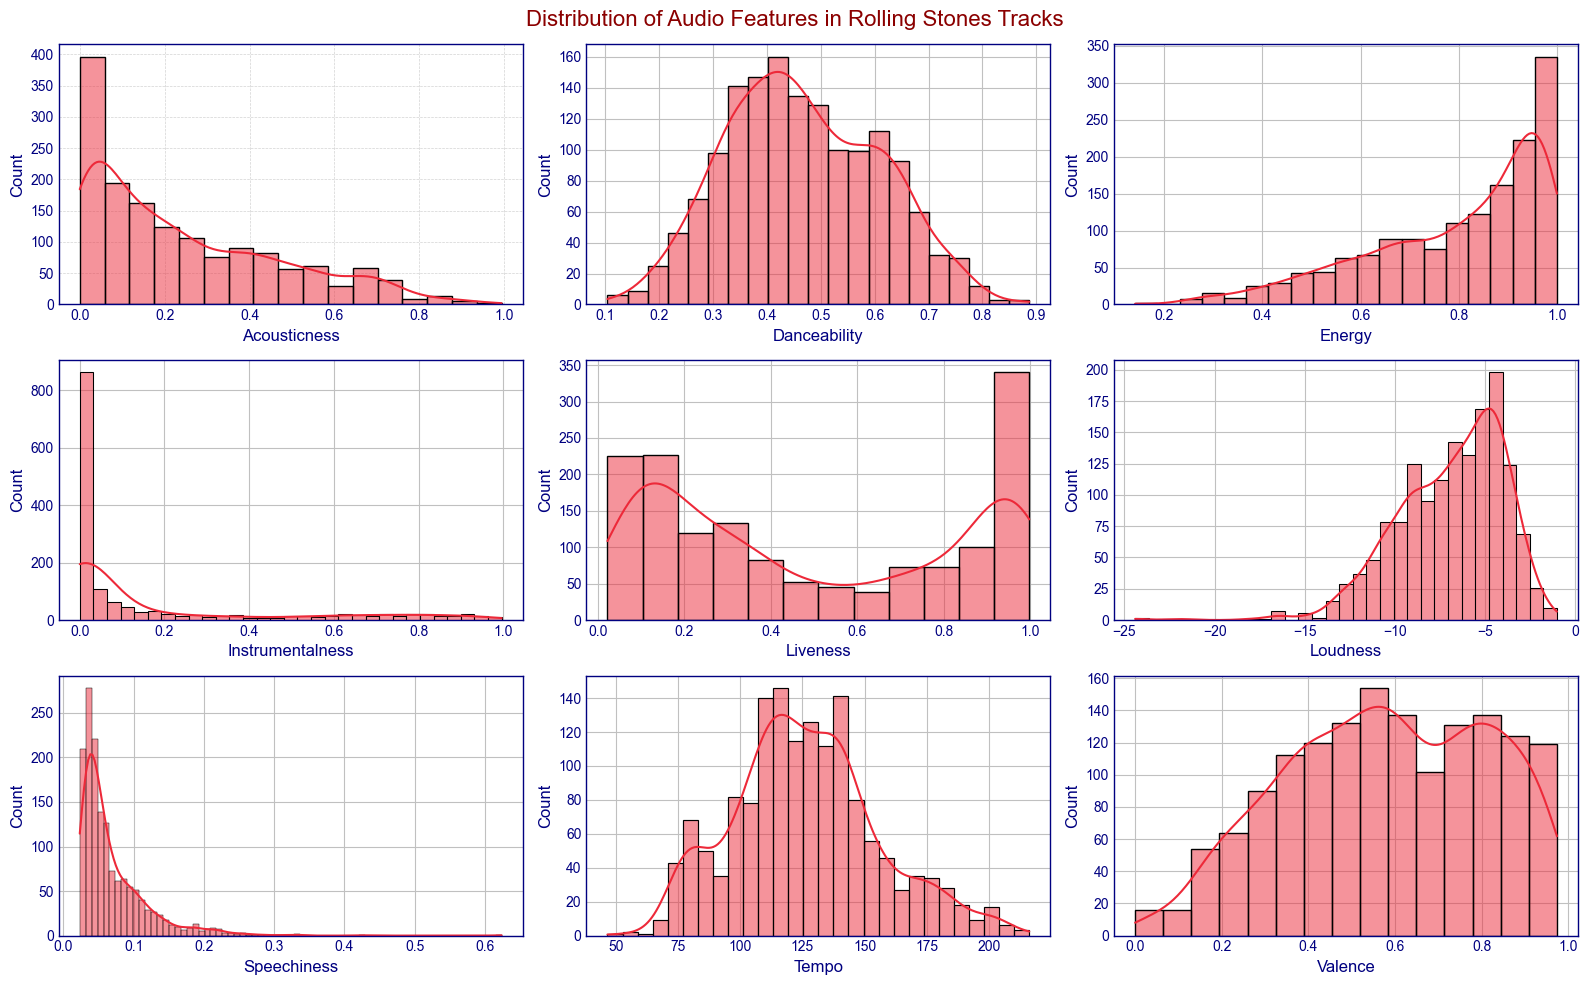


Correlation Matrix:


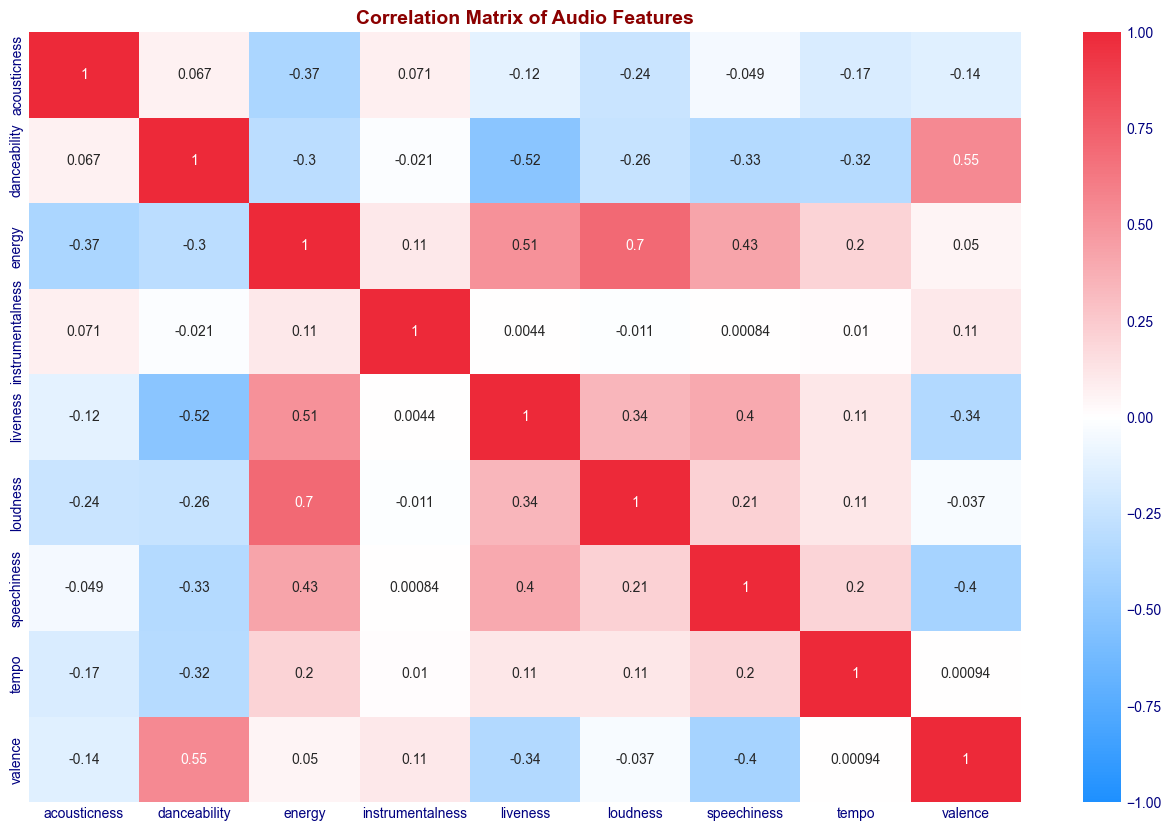


Unique Value Counts:
album: 90 unique values
name: 954 unique values


In [9]:
def perform_data_quality_check(df: pd.DataFrame) -> None:
    print("Data Quality Check Results:")
    
    # Set the custom style
    set_stones_style()
    
    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(df[AUDIO_FEATURES].describe())

    # Value ranges
    print("\nValue Ranges Check:")
    for feature in AUDIO_FEATURES:
        if feature != 'loudness' and feature != 'tempo':
            if (df[feature] < 0).any() or (df[feature] > 1).any():
                print(f"Warning: {feature} has values outside the expected [0, 1] range")
                
    # Distribution visualization
    print("\nDistribution Plots:")
    fig, axes = plt.subplots(3, 3, figsize=FIGURE_SIZES['large'])
    for i, feature in enumerate(AUDIO_FEATURES):
        sns.histplot(df_cleaned[feature], ax=axes[i//3, i%3], kde=True, color=STONES_PALETTE['red'])
        axes[i//3, i%3].set_xlabel(feature.capitalize())  # Capitalize x-axis label

    # Apply custom styling to the entire figure
    apply_stones_style(fig, fig.axes[0], 'Distribution of Audio Features')

    # Set the main title for the entire figure
    fig.suptitle('Distribution of Audio Features in Rolling Stones Tracks', fontsize=16, color=PLOT_STYLES['title_color'])

    # Remove the title from the first subplot
    axes[0, 0].set_title('')

    plt.tight_layout()
    plt.show()
    
    # Correlation check
    print("\nCorrelation Matrix:")
    correlation_matrix = df[AUDIO_FEATURES].corr()
    fig, ax = plt.subplots(figsize=FIGURE_SIZES['large'])
    sns.heatmap(correlation_matrix, annot=True, cmap='stones', vmin=-1, vmax=1, center=0, ax=ax)
    apply_stones_style(fig, ax, 'Correlation Matrix of Audio Features')
    plt.show()
    
    # Unique value counts for categorical variables
    print("\nUnique Value Counts:")
    categorical_columns = ['album', 'name']
    for col in categorical_columns:
        print(f"{col}: {df[col].nunique()} unique values")

# Perform the data quality check
perform_data_quality_check(df_cleaned)

## 🎵 The Rolling Stones: A Statistical Encore

Our comprehensive analysis of the Rolling Stones' Spotify data has revealed fascinating insights about their musical characteristics:

1. **Acousticness** 🪕: With an average of 0.25, most tracks lean towards the electric side, ranging from fully amplified (0.00001) to unplugged sessions (0.994).

2. **Danceability** 💃: The average of 0.47 indicates moderate groove, with tracks ranging from swaying (0.36) to highly danceable (0.89).

3. **Energy** ⚡: A high average of 0.79 confirms the Stones' reputation for energetic performances, with tracks ranging from mellow (0.14) to extremely energetic (0.999).

4. **Instrumentalness** 🎸: The low average of 0.17 indicates vocal dominance, but some tracks (up to 0.996) are primarily instrumental.

5. **Liveness** 🎤: An average of 0.49 suggests a mix of studio and live-sounding recordings, with some tracks feeling very live (up to 0.998).

6. **Loudness** 📢: The average of -7 decibels indicates generally loud tracks, ranging from quiet ballads (-24.4 dB) to very loud rockers (-1 dB).

7. **Speechiness** 🗣️: A low average of 0.07, with some tracks (up to 0.62) featuring more spoken words or rap-like sections.

8. **Tempo** ⏱️: Averaging 126 BPM, with a wide range from slow (47 BPM) to very fast (216 BPM).

9. **Valence** 😊: An average of 0.58 suggests a tendency towards upbeat tracks, but with the full spectrum from melancholic (0) to euphoric (0.97).

This analysis paints a picture of the Rolling Stones as a versatile band with a preference for high-energy, electric performances, but capable of exploring a wide range of musical styles and emotions. This diversity in their catalog reflects their long career and willingness to evolve their sound over time.

These insights will be valuable as we move into our clustering analysis, helping us understand which features might be most relevant in grouping similar tracks.

# Conclusion: From Soundcheck to Center Stage

We've completed our data cleaning and initial exploratory data analysis of the Rolling Stones' Spotify tracks. Our process included handling duplicates, identifying outliers, and gaining a comprehensive understanding of the audio features that characterize the band's music.

Key accomplishments:
1. Cleaned and preprocessed the dataset
2. Handled duplicate tracks while preserving important information
3. Identified and flagged outliers
4. Conducted a thorough analysis of audio feature distributions and correlations

These steps have prepared our dataset for the more advanced analyses to come. In our next notebook, we'll dive deeper into exploratory data analysis and feature engineering, further unraveling the musical tapestry of the Rolling Stones.

As we move forward, it's important to note that while this exploration has been fascinating, we've had to constrain our analysis to fit within the scope and time limitations of this project. The rich dataset invites deeper exploration, and as a learning data scientist, I've found myself constantly curious about further avenues of investigation. However, for now, we'll focus on the essential steps outlined in our problem statement.

Our next stop: '02_eda_and_feature_engineering.ipynb', where we'll delve deeper into the Rolling Stones' unique sound!